In [153]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [154]:
raw_data = pd.read_csv('imdb_labelled.txt', header = None, delimiter='\t')
raw_data.columns = ['review', 'rating']

In [155]:
raw_data.describe(include='all')

,review,rating
count,748,748.000000
unique,745,NaN
top,10/10,NaN
freq,2,NaN
mean,NaN,0.516043
std,NaN,0.500077
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,1.000000
75%,NaN,1.000000


# Creating a Classifier

So in this model, we will be creating a classifier that can work through multiple instances of similar data. For our first example, we will be using data pulled from Yelp, including their review and either a positive or negative rating, where 1 means positive, and 0 means negative.

We've loaded our data and described it, seeing it's essentially split down the middle. Now the goal is to match exactly what differentiates a positive from a negative comment.

In [156]:
raw_data['review'].unique()

array(['A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  ',
       'Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  ',
       'Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.  ',
       'Very little music or anything to speak of.  ',
       'The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.  ',
       "The rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty.  ",
       'Wasted two hours.  ',
       'Saw the movie today and thought it was a good effort, good messages for kids.  ',
       'A bit predictable.  ',
       'Loved the casting of Jimmy Buffet as the science teacher.  ',
       'And those baby owls were adorable.  ',
       "The movie showed a

In [157]:
for item in raw_data['review']:
    item = item.lower()
    item = item.replace('.','')
    item = item.replace('!','')
    item = item.replace(',','')
    print(item)

a very very very slow-moving aimless movie about a distressed drifting young man  
not sure who was more lost - the flat characters or the audience nearly half of whom walked out  
attempting artiness with black & white and clever camera angles the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent  
very little music or anything to speak of  
the best scene in the movie was when gerardo is trying to find a song that keeps running through his head  
the rest of the movie lacks art charm meaning if it's about emptiness it works i guess because it's empty  
wasted two hours  
saw the movie today and thought it was a good effort good messages for kids  
a bit predictable  
loved the casting of jimmy buffet as the science teacher  
and those baby owls were adorable  
the movie showed a lot of florida at it's best made it look very appealing  
the songs were the best and the muppets were so hilarious  
it was so cool  
this i

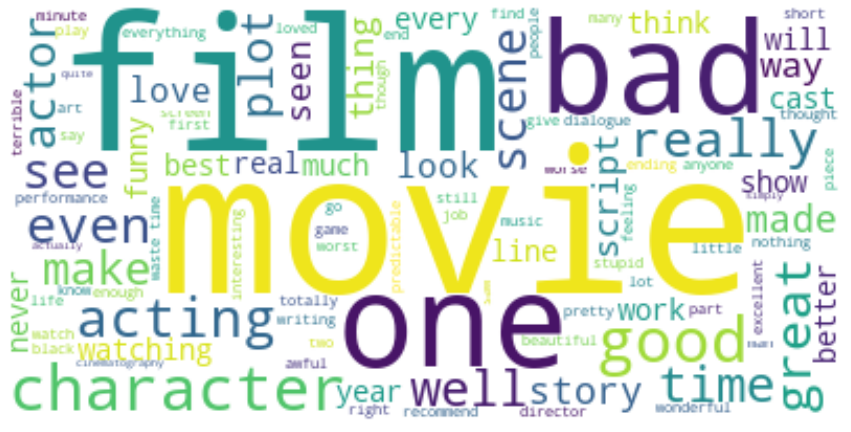

In [158]:
from wordcloud import WordCloud

wc = WordCloud(background_color="white", max_words=100, contour_width=3, contour_color='firebrick')

text = " ".join(review for review in raw_data.review)
wc.generate(text)

plt.figure(figsize=(15,20))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Here, running a quick word cloud, we can get a feel for what words are mostly said throughout these reviews, and we can use our better judgment to see which ones belong in either positive or negative categories. Some are ambiguous, though, so those we will overlook.

In [168]:
positive_keys = ['nice', 'great', 'good', 'best', 'fantastic', 'amazing', 'love', 'well', 'awesome', 'fresh', 'better', 'well', 'excellent', 'beautiful']
negative_keys = ['bad', 'never', 'bland', 'little', 'disappointed', 'worst', 'terrible', 'awful', 'predictable', 'never', 'stupid', 'not']

In [169]:
for key in positive_keys:
    raw_data[str(key)] = raw_data.review.str.contains(str(key), case=False)
for key in negative_keys:
    raw_data[str(key)] = raw_data.review.str.contains(str(key), case=False)

In [170]:
positive_data = (raw_data[raw_data['rating']==1])
negative_data = (raw_data[raw_data['rating']==0])
positive_data.drop(columns=negative_keys,inplace=True)
negative_data.drop(columns=positive_keys,inplace=True)
positive_data.drop(columns='rating',inplace=True)
negative_data.drop(columns='rating',inplace=True)

c:\users\jcboy\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:4097: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


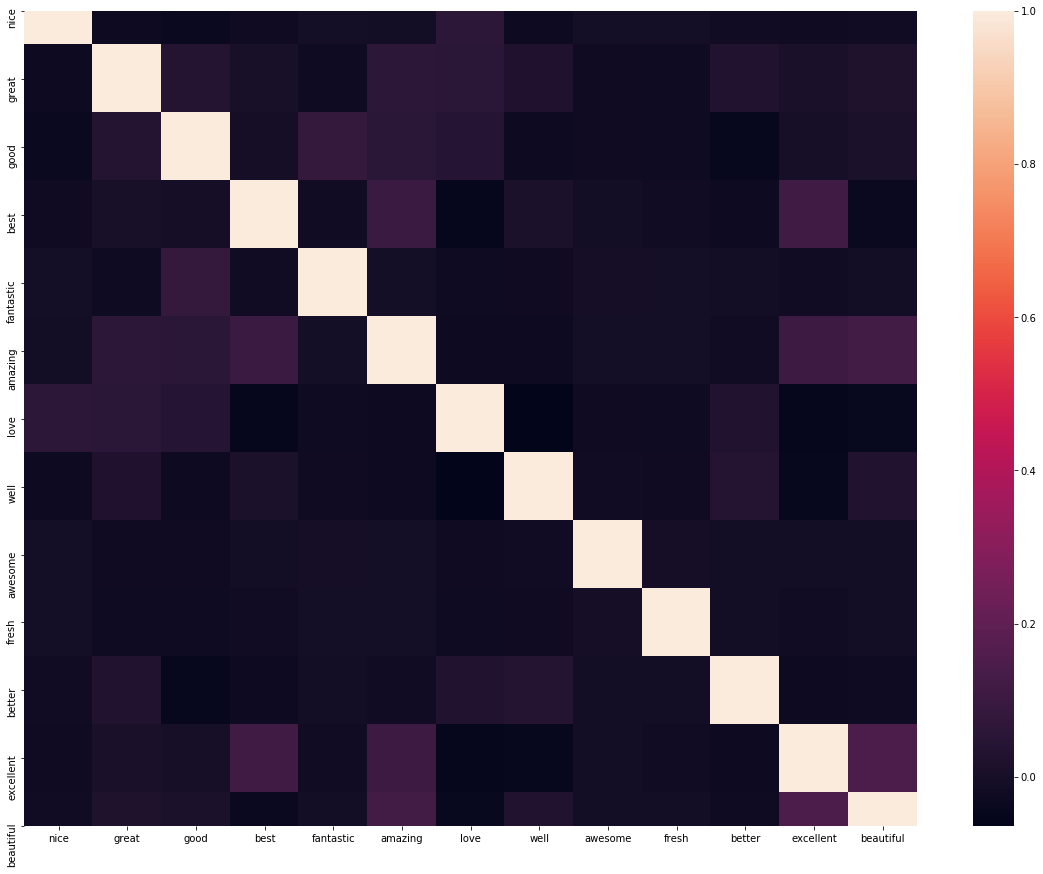

In [171]:
plt.figure(figsize = (20,15))
sns.heatmap(positive_data.corr())

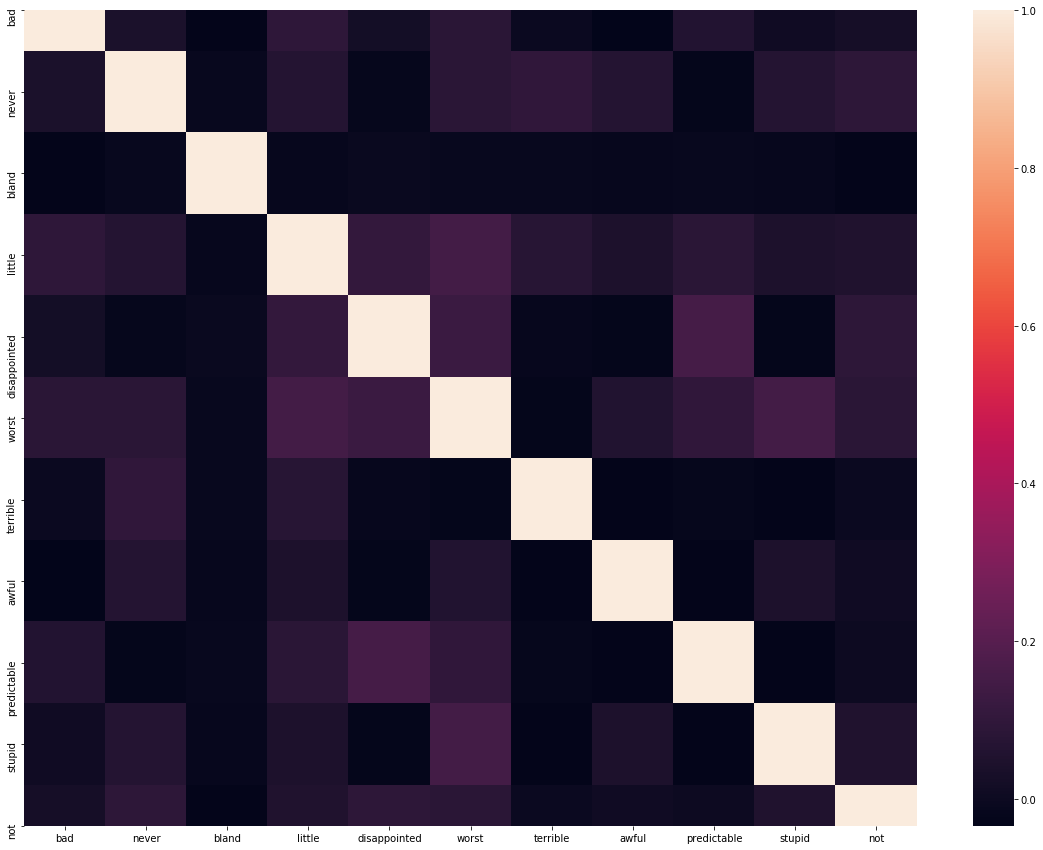

In [172]:
plt.figure(figsize=(20,15))
sns.heatmap(negative_data.corr())

In [173]:
data = raw_data[positive_keys]
target = raw_data['rating']

from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(data,target)

y_pred = bnb.predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)




Number of mislabeled points out of a total 748 points : 287


array([[326,  36],
       [251, 135]], dtype=int64)

In [174]:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=50)

array([0.8125    , 0.5625    , 0.4375    , 0.6875    , 0.5625    ,
       0.75      , 0.5625    , 0.5       , 0.5       , 0.625     ,
       0.75      , 0.5625    , 0.6       , 0.8       , 0.8       ,
       0.46666667, 0.46666667, 0.8       , 0.53333333, 0.53333333,
       0.6       , 0.73333333, 0.8       , 0.6       , 0.66666667,
       0.53333333, 0.66666667, 0.53333333, 0.46666667, 0.6       ,
       0.66666667, 0.66666667, 0.46666667, 0.73333333, 0.66666667,
       0.6       , 0.42857143, 0.57142857, 0.71428571, 0.5       ,
       0.71428571, 0.5       , 0.71428571, 0.57142857, 0.57142857,
       0.5       , 0.5       , 0.64285714, 0.5       , 0.64285714])

In [175]:
data = raw_data[negative_keys]
target = raw_data['rating']

from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(data,target)

y_pred = bnb.predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)



Number of mislabeled points out of a total 748 points : 250


array([[143, 219],
       [ 31, 355]], dtype=int64)

In [176]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=50)

array([0.75      , 0.8125    , 0.4375    , 0.5       , 0.75      ,
       0.6875    , 0.5625    , 0.625     , 0.6875    , 0.5625    ,
       0.75      , 0.6875    , 0.6       , 0.4       , 0.73333333,
       0.66666667, 0.8       , 0.66666667, 0.73333333, 0.73333333,
       0.73333333, 0.8       , 0.66666667, 0.66666667, 0.73333333,
       0.46666667, 0.6       , 0.86666667, 0.73333333, 0.86666667,
       0.73333333, 0.6       , 0.66666667, 0.8       , 0.53333333,
       0.53333333, 0.71428571, 0.85714286, 0.57142857, 0.57142857,
       0.57142857, 0.42857143, 0.42857143, 0.64285714, 0.78571429,
       0.64285714, 0.78571429, 0.85714286, 0.64285714, 0.57142857])